<a href="https://colab.research.google.com/github/rshamsini/Projects/blob/master/Verzeo_ML_MajorProject_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MAJOR PROJECT

## OBJECTIVE:

To predict the cost of used cars

## PROCESS:

1.Detailed analysis of the data set given.

2.To clean the given data set.

3.To choose the best attributes to train the data.

4.To select the appropriate regression model (Random forest regressor) to train the data.

5.Calculating accuracy of the regression model

6.Predicting the price of the used cars in the test dataset.


In [ ]:
#Mounting google drive
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading trained data and test data
data=pd.read_excel("/content/drive/My Drive/Data_Train (1).xlsx")
datatest=pd.read_excel("/content/drive/My Drive/Data_Test (1).xlsx")

In [ ]:
print(data.head())

                               Name    Location  Year  ...  Seats  New_Price  Price
0            Maruti Wagon R LXI CNG      Mumbai  2010  ...    5.0        NaN   1.75
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...    5.0        NaN  12.50
2                      Honda Jazz V     Chennai  2011  ...    5.0  8.61 Lakh   4.50
3                 Maruti Ertiga VDI     Chennai  2012  ...    7.0        NaN   6.00
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...    5.0        NaN  17.74

[5 rows x 13 columns]


In [ ]:
#Analysis of null values in the data set
data.drop('New_Price',axis=1,inplace=True)
datatest.drop('New_Price',axis=1,inplace=True)
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
data.head(100)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Honda Amaze SX i-DTEC,Kolkata,2015,30000,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,3.50
96,Volkswagen Polo Diesel Highline 1.2L,Kolkata,2013,34212,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,2.79
97,Hyundai Verna Transform SX VGT CRDi,Ahmedabad,2010,70002,Diesel,Manual,First,16.2 kmpl,1493 CC,110 bhp,5.0,3.45
98,Maruti Wagon R VXI BS IV,Bangalore,2016,62000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,4.45


In [ ]:
data.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data)


                                  Name    Location  ...  Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  ...    5.0   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0  12.50
2                         Honda Jazz V     Chennai  ...    5.0   4.50
3                    Maruti Ertiga VDI     Chennai  ...    7.0   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0  17.74
...                                ...         ...  ...    ...    ...
6014                  Maruti Swift VDI       Delhi  ...    5.0   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  ...    5.0   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  ...    8.0   2.90
6017                Maruti Wagon R VXI     Kolkata  ...    5.0   2.65
6018             Chevrolet Beat Diesel   Hyderabad  ...    5.0   2.50

[6019 rows x 12 columns]


In [ ]:
data.fillna('null',inplace=True)
data['Mileage']=data['Mileage'].astype(str)
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' kmpl',''))
data['Mileage']=data['Mileage'].map(lambda x: x.replace(' km/kg',''))
data['Mileage']=data['Mileage'].map(lambda x: x.replace('null','0'))
data['Mileage']=data['Mileage'].astype(float)
datatest['Mileage']=datatest['Mileage'].astype(str)
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' kmpl',''))
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace(' km/kg',''))
datatest['Mileage']=datatest['Mileage'].map(lambda x: x.replace('null','0'))
datatest['Mileage']=datatest['Mileage'].astype(float)
data['Power']=data['Power'].astype(str)
data['Power']=data['Power'].map(lambda x: x.replace(' bhp',''))
data['Power']=data['Power'].map(lambda x: x.replace('null','0'))
data['Power']=data['Power'].astype(float)
datatest['Power']=datatest['Power'].astype(str)
datatest['Power']=datatest['Power'].map(lambda x: x.replace(' bhp',''))
datatest['Power']=datatest['Power'].map(lambda x: x.replace('null','0'))
datatest['Power']=datatest['Power'].astype(float)
data['Engine']=data['Engine'].astype(str)
data['Engine']=data['Engine'].map(lambda x: x.replace(' CC',''))
data['Engine']=data['Engine'].map(lambda x: x.replace('null','0'))
data['Engine']=data['Engine'].astype(float)
datatest['Engine']=datatest['Engine'].astype(str)
datatest['Engine']=datatest['Engine'].map(lambda x: x.replace(' CC',''))
datatest['Engine']=datatest['Engine'].map(lambda x: x.replace('null','0'))
datatest['Engine']=datatest['Engine'].astype(float)
print(data)

print(data.isnull().sum())

                                  Name    Location  Year  ...   Power Seats  Price
0               Maruti Wagon R LXI CNG      Mumbai  2010  ...   58.16     5   1.75
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015  ...  126.20     5  12.50
2                         Honda Jazz V     Chennai  2011  ...   88.70     5   4.50
3                    Maruti Ertiga VDI     Chennai  2012  ...   88.76     7   6.00
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013  ...  140.80     5  17.74
...                                ...         ...   ...  ...     ...   ...    ...
6014                  Maruti Swift VDI       Delhi  2014  ...   74.00     5   4.75
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015  ...   71.00     5   4.00
6016             Mahindra Xylo D4 BSIV      Jaipur  2012  ...  112.00     8   2.90
6017                Maruti Wagon R VXI     Kolkata  2013  ...   67.10     5   2.65
6018             Chevrolet Beat Diesel   Hyderabad  2011  ...   57.60     5   2.50

[60

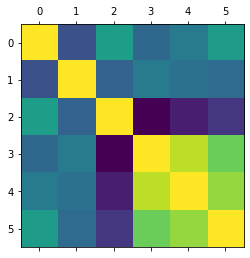

In [ ]:
plt.matshow(data.corr())

In [ ]:
print(data['Fuel_Type'].unique())
print(data['Location'].unique())
print(data['Owner_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['First' 'Second' 'Fourth & Above' 'Third']


Name
Mahindra XUV500 W8 2WD    49
Maruti Swift VDI          45
Maruti Swift Dzire VDI    34
Honda City 1.5 S MT       34
Maruti Swift VDI BSIV     31
Name: Name, dtype: int64


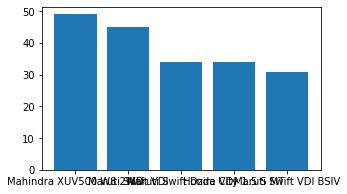

Fuel_Type
Diesel    3200
Petrol    2742
CNG         56
Name: Fuel_Type, dtype: int64


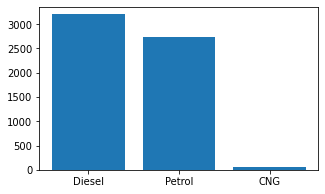

Location
Mumbai        786
Hyderabad     736
Kochi         651
Coimbatore    635
Pune          619
Name: Location, dtype: int64


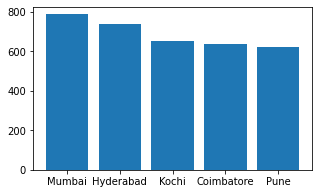

Owner_Type
First     4919
Second     966
Third      113
Name: Owner_Type, dtype: int64


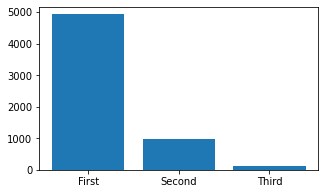

Transmission
Manual       4281
Automatic    1717
Name: Transmission, dtype: int64


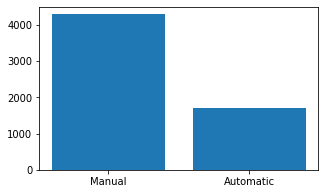

In [ ]:
categories = ['Name','Fuel_Type','Location','Owner_Type','Transmission']

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [ ]:
data.drop(data.loc[data['Owner_Type']=='Fourth & Above'].index, inplace=True)
data.drop(data.loc[data['Fuel_Type']=='LPG'].index, inplace=True)
data.drop(data.loc[data['Fuel_Type']=='Electric'].index, inplace=True)

In [ ]:
y=data['Price']
x=data.drop(['Price','Location','Fuel_Type','Owner_Type','Name','Transmission'],axis=1,inplace=False)
x.replace('null',0,inplace=True)


print(x.head(10))
print(y.head(10))

    Year  Kilometers_Driven  Mileage  Engine   Power  Seats
0   2010              72000    26.60   998.0   58.16    5.0
1   2015              41000    19.67  1582.0  126.20    5.0
2   2011              46000    18.20  1199.0   88.70    5.0
3   2012              87000    20.77  1248.0   88.76    7.0
4   2013              40670    15.20  1968.0  140.80    5.0
6   2013              86999    23.08  1461.0   63.10    5.0
7   2016              36000    11.36  2755.0  171.50    8.0
8   2013              64430    20.54  1598.0  103.60    5.0
9   2012              65932    22.30  1248.0   74.00    5.0
10  2018              25692    21.56  1462.0  103.25    5.0
0      1.75
1     12.50
2      4.50
3      6.00
4     17.74
6      3.50
7     17.50
8      5.20
9      1.95
10     9.95
Name: Price, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4018, 6) (1980, 6) (4018,) (1980,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.4s finished


In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.8274797549083662
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1000}


In [ ]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.90


In [ ]:
x_test=data.drop(['Price','Location','Fuel_Type','Owner_Type','Name','Transmission'],axis=1,inplace=False)
x_test.replace('null',0,inplace=True)
y=forest.predict(x_test)
print(y)

[ 1.9467863  11.76333828  3.26958753 ...  5.13185994  2.90909303
  2.17753269]


CONCLUSION:

Thus the model has been trained and the cost of the used cars are predicted successfully as shown above.